In [59]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import MinMaxScaler  # For data scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score  # For evaluating model performance

# Load the MNIST dataset
mnist_df = pd.read_csv('/content/drive/MyDrive/Datasets/mnist_df.csv')

# Print the shape of the dataset (number of rows and columns)
print(mnist_df.shape)

(70000, 785)


In [60]:
# Display the first 3 rows of the DataFrame
mnist_df.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


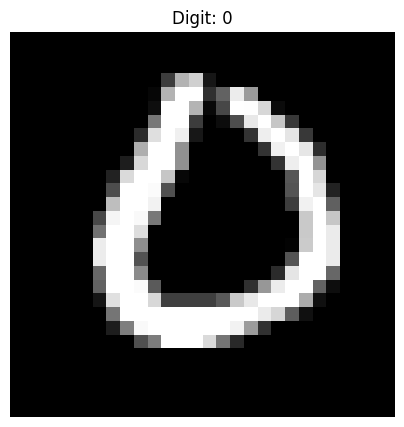

In [61]:
# Data Visualization

# Select a specific row from the DataFrame (e.g., row 2500)
row = mnist_df.iloc[2500]

# Extract the label (digit) of the selected row
label = row['label']

# Extract the pixel values of the selected row (excluding the label)
pixels = row[1:].values

# Reshape the pixel values into a 28x28 array to represent the image
image_array = pixels.reshape(28, 28)

# Create a figure and Generate a heatmap of the image using Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(image_array, cmap='gray', cbar=False, square=True, xticklabels=False, yticklabels=False)
plt.title(f"Digit: {label}")
plt.show()

In [62]:
# Data Normalization

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Separate features (pixel values) and target (labels)
x_df = mnist_df.drop('label', axis=1)  # Features (pixel values)
y_df = mnist_df['label']  # Target (labels)

# Apply Min-Max scaling to the features
x_df = scaler.fit_transform(x_df)
x_df = pd.DataFrame(x_df)  # Convert the scaled features back to a DataFrame

In [64]:
# Display the first 3 rows of the Features DataFrame
x_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# Display the first 3 rows of the Target DataFrame
y_df.head(3)

,label
0,5
1,0
2,4


In [66]:
# Train-Test Splitting

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=42)

# Print the shapes of the original, training, and testing sets
print(x_df.shape, x_train.shape, x_test.shape)

(70000, 784) (63000, 784) (7000, 784)


In [67]:
# Model Training and Prediction

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

# Print the training accuracy
print(f'Training Accuracy: {model.score(x_train, y_train)*100:.2f}%')

# Make predictions on the test set
y_pred = model.predict(x_test)

# Print the predictions
print(y_pred)

Training Accuracy: 93.83%
[8 4 5 ... 5 2 6]


In [68]:
# Evaluate the model and print the testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

Testing Accuracy: 92.06%


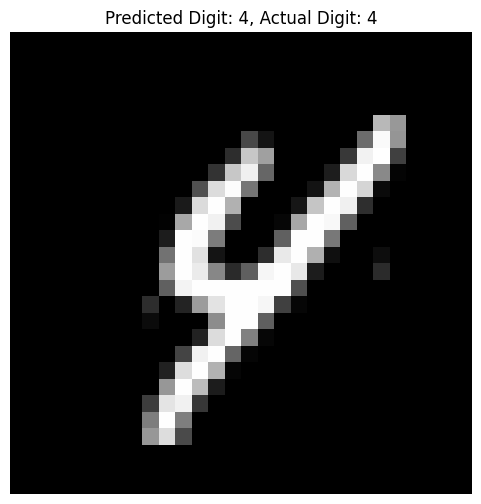

In [58]:
# Select a random index from the test set
index = np.random.randint(0, len(x_test))

# Get the data point and its label
single_digit_data = x_test.iloc[[index]]
single_digit_label = y_test.iloc[index]

# Reshape the data point to a 28x28 image
image_array = np.array(single_digit_data).reshape(28, 28)

# Make the prediction
prediction = model.predict(single_digit_data)

# Display the image and the predicted label
plt.figure(figsize=(6, 6))
sns.heatmap(image_array, cmap='gray', cbar=False, square=True, xticklabels=False, yticklabels=False)
plt.title(f"Predicted Digit: {prediction[0]}, Actual Digit: {single_digit_label}")
plt.show()